In [8]:
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


Now, let's do the "buy Apple" strategy:

In [16]:
from zipline.api import order, record, symbol


def initialize(context):
    pass


def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data.current(symbol('AAPL'), 'price'))

Now, we'd like to back-test this. We should be able to either use: 
zipline run --bundle quantopian-quandl -f apple_backtest.py --start 2000-1-1 --end 2018-1-1 --output buyapple_out.pickle 
via the command line or terminal, or, in IPython notebooks, we can just do something like:

%zipline --bundle quantopian-quandl --start 2008-1-1 --end 2012-1-1 -o dma.pickle

As of my latest testing, this now works. Before, this was broken due to them using an API that was deprecated. The solution appears to be another API for the benchmark, so this could break at any time. If it does break, we can easily remedy it, no big deal. You do NOT need to do the following if things are working, just if you need to overcome errors:

## class 3 Custom Data with Zipline Local - Python Programming for Finance

%zipline --bundle quantopian-quandl --start 2000-1-1 --end 2012-1-1 -o backtest.pickle, you also could use zipline.exe to run things. The return here is a pandas dataframe, which we also stored to backtest.pickle.

Now, we have a few options. One is to just load in the dataframe and visualize it. For example:

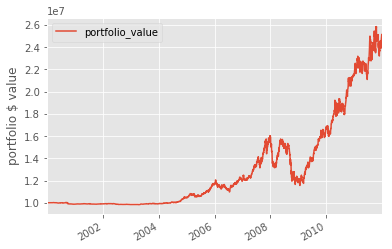

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2000-01-03 21:00:00+00:00,111.940,NaN,0.000000e+00,NaN,-0.003075,NaN,NaN,0.000000,1.000000e+07,0.0,...,0.0,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2000-01-04 21:00:00+00:00,102.500,5.865048e-07,-5.225000e-08,NaN,-0.006141,0.000000,NaN,-1025.522500,9.998974e+06,1025.0,...,0.0,0.0,0,-11.224972,1.000000e+07,0.0,0.0,2,"[{'amount': 10, 'price': 102.55125, 'dt': 2000...",0.0
2000-01-05 21:00:00+00:00,104.000,1.350778e-05,1.394750e-06,NaN,-0.009197,0.000000,NaN,-1040.530000,9.997934e+06,2080.0,...,0.0,0.0,0,244.652548,9.998974e+06,1025.0,1025.0,3,"[{'amount': 10, 'price': 104.052, 'dt': 2000-0...",0.0
2000-01-06 21:00:00+00:00,95.000,1.473588e-04,-1.665375e-05,NaN,-0.012243,0.000000,NaN,-950.485000,9.996983e+06,2850.0,...,0.0,0.0,0,-7.323848,9.997934e+06,2080.0,2080.0,4,"[{'amount': 10, 'price': 95.0475, 'dt': 2000-0...",0.0
2000-01-07 21:00:00+00:00,99.500,1.786638e-04,-3.204500e-06,NaN,-0.015281,0.000000,NaN,-995.507500,9.995988e+06,3980.0,...,0.0,0.0,0,-1.260374,9.996983e+06,2850.0,2850.0,5,"[{'amount': 10, 'price': 99.54975, 'dt': 2000-...",0.0
2000-01-10 21:00:00+00:00,97.750,1.651115e-04,-1.025437e-05,NaN,-0.018309,0.000000,NaN,-977.998750,9.995010e+06,4887.5,...,0.0,0.0,0,-3.429632,9.995988e+06,3980.0,3980.0,6,"[{'amount': 10, 'price': 97.798875, 'dt': 2000...",0.0
2000-01-11 21:00:00+00:00,92.750,2.057353e-04,-3.530175e-05,NaN,-0.021328,0.000000,NaN,-927.973750,9.994082e+06,5565.0,...,0.0,0.0,0,-6.688567,9.995010e+06,4887.5,4887.5,7,"[{'amount': 10, 'price': 92.796375, 'dt': 2000...",0.0
2000-01-12 21:00:00+00:00,87.190,2.482341e-04,-6.870634e-05,NaN,-0.024337,0.000000,NaN,-872.345950,9.993210e+06,6103.3,...,0.0,0.0,0,-8.377545,9.994082e+06,5565.0,5565.0,8,"[{'amount': 10, 'price': 87.233595, 'dt': 2000...",0.0
2000-01-13 21:00:00+00:00,96.750,4.619211e-04,-1.835720e-06,NaN,-0.027337,0.000000,NaN,-967.993750,9.992242e+06,7740.0,...,0.0,0.0,0,-0.210640,9.993210e+06,6103.3,6103.3,9,"[{'amount': 10, 'price': 96.798375, 'dt': 2000...",0.0
2000-01-14 21:00:00+00:00,100.440,4.602723e-04,2.763306e-05,NaN,-0.030328,0.000000,NaN,-1004.912200,9.991237e+06,9039.6,...,0.0,0.0,0,3.013979,9.992242e+06,7740.0,7740.0,10,"[{'amount': 10, 'price': 100.49022, 'dt': 2000...",0.0


In [17]:
%zipline --bundle quantopian-quandl --start 2000-1-1 --end 2012-1-1 -o backtest.pickle

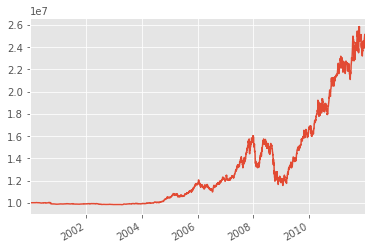

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style


style.use('ggplot')

backtest_df = pd.read_pickle("backtest.pickle")
backtest_df.portfolio_value.plot()
plt.show()

In [19]:
backtest_df.columns

Index(['AAPL', 'algo_volatility', 'algorithm_period_return', 'alpha',
       'benchmark_period_return', 'benchmark_volatility', 'beta',
       'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
       'excess_return', 'gross_leverage', 'long_exposure', 'long_value',
       'longs_count', 'max_drawdown', 'max_leverage', 'net_leverage', 'orders',
       'period_close', 'period_label', 'period_open', 'pnl', 'portfolio_value',
       'positions', 'returns', 'sharpe', 'short_exposure', 'short_value',
       'shorts_count', 'sortino', 'starting_cash', 'starting_exposure',
       'starting_value', 'trading_days', 'transactions',
       'treasury_period_return'],
      dtype='object')

Just like in Quantopian, we can also use the record function to record more data to our output. We can also perform modifications to the dataframe, 

In [23]:
backtest_df.max_drawdown

2000-01-03 21:00:00+00:00    0.000000e+00
2000-01-04 21:00:00+00:00   -5.225000e-08
2000-01-05 21:00:00+00:00   -5.225000e-08
2000-01-06 21:00:00+00:00   -1.804847e-05
2000-01-07 21:00:00+00:00   -1.804847e-05
2000-01-10 21:00:00+00:00   -1.804847e-05
2000-01-11 21:00:00+00:00   -3.669645e-05
2000-01-12 21:00:00+00:00   -7.010100e-05
2000-01-13 21:00:00+00:00   -7.010100e-05
2000-01-14 21:00:00+00:00   -7.010100e-05
2000-01-18 21:00:00+00:00   -7.010100e-05
2000-01-19 21:00:00+00:00   -7.010100e-05
2000-01-20 21:00:00+00:00   -7.010100e-05
2000-01-21 21:00:00+00:00   -7.010100e-05
2000-01-24 21:00:00+00:00   -9.215590e-05
2000-01-25 21:00:00+00:00   -9.215590e-05
2000-01-26 21:00:00+00:00   -9.215590e-05
2000-01-27 21:00:00+00:00   -9.215590e-05
2000-01-28 21:00:00+00:00   -1.847620e-04
2000-01-31 21:00:00+00:00   -1.847620e-04
2000-02-01 21:00:00+00:00   -2.130214e-04
2000-02-02 21:00:00+00:00   -2.418672e-04
2000-02-03 21:00:00+00:00   -2.418672e-04
2000-02-04 21:00:00+00:00   -2.418

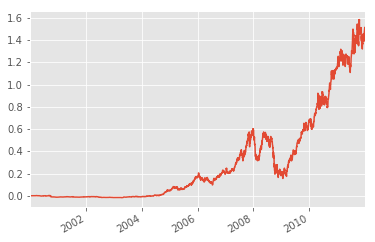

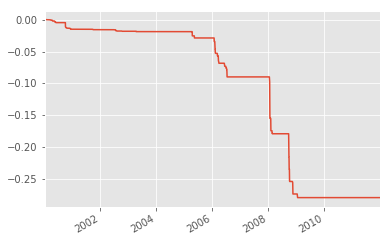

In [25]:
backtest_df.portfolio_value.pct_change().fillna(0).add(1).cumprod().sub(1).plot()
plt.show()

backtest_df.max_drawdown.plot()
plt.show()


Another option you have to visualize things is automatically with an analyze function.

In [6]:
from zipline.api import order, record, symbol
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')


def initialize(context):
    pass


def handle_data(context, data):
    order(symbol("AAPL"), 10)
    record(AAPL=data.current(symbol('EBAY'), 'price'))


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio $ value')
    plt.legend(loc=0)
    plt.show()   

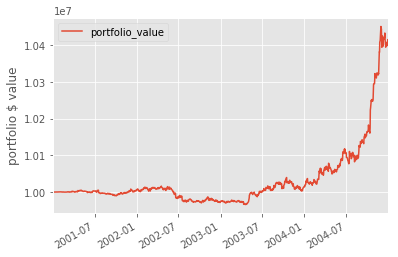

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2001-01-02 21:00:00+00:00,30.19,NaN,0.000000e+00,NaN,-0.003075,NaN,NaN,0.000000,1.000000e+07,0.00,...,0.0,0.0,0,NaN,1.000000e+07,0.00,0.00,1,[],0.0
2001-01-03 21:00:00+00:00,39.36,1.031014e-07,-9.185000e-09,NaN,-0.006141,0.000000,NaN,-163.791850,9.999836e+06,163.70,...,0.0,0.0,0,-11.224972,1.000000e+07,0.00,0.00,2,"[{'amount': 10, 'price': 16.378185000000002, '...",0.0
2001-01-04 21:00:00+00:00,35.38,6.279125e-06,6.712850e-07,NaN,-0.009197,0.000000,NaN,-170.695300,9.999666e+06,341.20,...,0.0,0.0,0,669.834365,9.999836e+06,163.70,163.70,3,"[{'amount': 10, 'price': 17.06853, 'dt': 2001-...",0.0
2001-01-05 21:00:00+00:00,30.56,1.379077e-05,-7.179000e-07,NaN,-0.012243,0.000000,NaN,-163.791850,9.999502e+06,491.10,...,0.0,0.0,0,-4.101705,9.999666e+06,341.20,341.20,4,"[{'amount': 10, 'price': 16.378185000000002, '...",0.0
2001-01-08 21:00:00+00:00,30.63,1.304809e-05,-1.571800e-07,NaN,-0.015281,0.000000,NaN,-165.692800,9.999336e+06,662.40,...,0.0,0.0,0,-0.803229,9.999502e+06,491.10,491.10,5,"[{'amount': 10, 'price': 16.568279999999998, '...",0.0
2001-01-09 21:00:00+00:00,33.38,2.018817e-05,2.353225e-06,NaN,-0.018309,0.000000,NaN,-171.995950,9.999164e+06,859.50,...,0.0,0.0,0,10.977897,9.999336e+06,662.40,662.40,6,"[{'amount': 10, 'price': 17.198595, 'dt': 2001...",0.0
2001-01-10 21:00:00+00:00,39.31,2.817273e-05,-8.060550e-07,NaN,-0.021328,0.000000,NaN,-165.692800,9.998998e+06,993.60,...,0.0,0.0,0,-1.401323,9.999164e+06,859.50,859.50,7,"[{'amount': 10, 'price': 16.568279999999998, '...",0.0
2001-01-11 21:00:00+00:00,40.94,5.558207e-05,7.823945e-06,NaN,-0.024337,0.000000,NaN,-180.100000,9.998818e+06,1260.00,...,0.0,0.0,0,12.723580,9.998998e+06,993.60,993.60,8,"[{'amount': 10, 'price': 18.009, 'dt': 2001-01...",0.0
2001-01-12 21:00:00+00:00,40.06,6.280316e-05,2.144350e-06,NaN,-0.027337,0.000000,NaN,-171.995950,9.998646e+06,1375.20,...,0.0,0.0,0,1.707387,9.998818e+06,1260.00,1260.00,9,"[{'amount': 10, 'price': 17.198595, 'dt': 2001...",0.0
2001-01-16 21:00:00+00:00,44.25,5.935009e-05,1.574790e-06,NaN,-0.030328,0.000000,NaN,-171.295600,9.998475e+06,1540.80,...,0.0,0.0,0,1.185212,9.998646e+06,1375.20,1375.20,10,"[{'amount': 10, 'price': 17.12856, 'dt': 2001-...",0.0


In [7]:
%zipline --bundle quantopian-quandl --start 2001-1-1 --end 2005-1-1 -o backtest.pickle

I have personally found that I prefer to keep the backtest and visualization separated, so I can tinker around with the results, rather than needing to re-run everything just to visualize various different things, but, once you have solidified exactly what you want to see, the analyze function could save some time.

Anyway, up to this point, we've just used some pre-bundled data, and one of the major reasons why we might want to use Zipline locally is to use our own data, so let's work on doing that in the next tutorial!